<a href="https://www.kaggle.com/code/buketkalfa/depresyon-dataset-eda?scriptVersionId=209250162" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-dataset/depression_data.csv



**Veri Kümesi Hakkında**
> Veri Kümesi Genel Bakış (Sentetik):
* Bu veri kümesi, bireylerin kişisel ve yaşam tarzı faktörleriyle ilgili çeşitli özelliklerini içermektedir. Sağlık, yaşam tarzı ve sosyo-ekonomik durum gibi alanlarda analiz yapmayı kolaylaştırmak için tasarlanmıştır.

> Özellikler
* Name: Bireyin tam adı.
* Age: Bireyin yaşı (yıl cinsinden).
* Marital Status: Bireyin medeni durumu. Olası değerler: Single, Married, Divorced, Widowed.
* Education Level: Bireyin elde ettiği en yüksek eğitim seviyesi. Olası değerler: High School, Associate Degree, Bachelor's Degree, Master's Degree, PhD.
* Number of Children: Bireyin sahip olduğu çocuk sayısı.
* Smoking Status: Bireyin sigara içme durumu. Olası değerler: Smoker, Former, Non-smoker.
* Physical Activity Level: Bireyin yaptığı fiziksel aktivite düzeyi. Olası değerler: Sedentary, Moderate, Active.
* Employment Status: Bireyin istihdam durumu. Olası değerler: Employed, Unemployed.
* Income: Bireyin yıllık geliri (USD cinsinden).
* Alcohol Consumption: Alkol tüketim düzeyi. Olası değerler: Low, Moderate, High.
* Dietary Habits: Bireyin diyet alışkanlıkları. Olası değerler: Healthy, Moderate, Unhealthy.
* Sleep Patterns: Uyku kalitesi. Olası değerler: Good, Fair, Poor.
* History of Mental Illness: Bireyin mental hastalık geçmişi olup olmadığı. Olası değerler: Yes, No.
* History of Substance Abuse: Bireyin madde bağımlılığı geçmişi olup olmadığı. Olası değerler: Yes, No.
* Family History of Depression: Ailede depresyon geçmişi olup olmadığını belirtir. Olası değerler: Yes, No.
* Chronic Medical Conditions: Bireyin kronik tıbbi durumları olup olmadığını belirtir. Olası değerler: Yes, No.

> Kullanım Alanları
* Bu veri kümesi, çeşitli sağlık, yaşam tarzı ve sosyo-ekonomik faktörlerin analizinde kullanılmak üzere tasarlanmıştır. Predictive modeling (tahmin modelleri), clustering (kümeleme) ve exploratory data analysis (keşifsel veri analizi) gibi görevler için uygundur.


# 1. Kütüphaneleri Yükleme İşlemi

In [2]:
import numpy as np    #Sayısal hesaplamalar ve veri manipülasyonu için kullanılır.
                      #Diziler ve çok boyutlu dizilerle çalışmayı kolaylaştırır.
                      #Hızlı ve verimli vektör operasyonları ve çeşitli matematiksel fonksiyonlar sağlar.

import pandas as pd   #Veri okuma, temizleme, analiz etme ve işleme için kullanılır.

import os             #Dosya ve dizin işlemlerini yapabilmek için kullanılır.
                      #Dosyaların bulunduğu dizini değiştirme veya mevcut dosyaları listeleme vb.
                      #Sistemle etkileşime geçip dosya yollarını yönetmenizi sağlar.

import seaborn as sns #İstatistiksel veri görselleştirmeleri yapar. Matplotlib üzerine kuruludur.
                      #Gelişmiş ve estetik grafikleri oluşturmanızı sağlar.
                      #Veri dağılımını, ilişkilerini ve kategorik verileri gösteren grafikler oluşturmak için kullanılır.

import matplotlib.pyplot as plt #Temel ve esnek veri görselleştirmeleri yapar.

import plotly.express as px #Etkileşimli ve dinamik grafikler oluşturur. Kullanıcıların grafiklerle etkileşime girmesini sağlayan güçlü bir araçtır.
                            #3D grafikler, coğrafi haritalar ve hareketli grafikler gibi ileri seviye görselleştirmeleri destekler.

#Eksik veri analizi için ve giderilmesi için
import missingno as msno

# Gerekli modüller ve ayarlar
import warnings  # Uyarıları kontrol etmek için warnings modülü kullanılır.
warnings.filterwarnings("ignore")  # Tüm uyarıları gizlemek için kullanılır.

# Matplotlib'te grafik stili ayarları
from matplotlib import style  # Grafik stillerini değiştirmek için style modülü.
style.use("ggplot")  # ggplot stilini uygular. Bu stil, modern ve estetik bir görünüm sağlar.

# 2.Veri Setini Yükleme İşlemi ve Veri Hakkında Bilgiler 

In [3]:
# Veri setini yükle
df_ = pd.read_csv("/kaggle/input/depression-dataset/depression_data.csv")
#Bu satırda, dosyadaki veriler, pandas kütüphanesi kullanılarak okunur ve df değişkenine atanır.
#Artık df üzerinden çeşitli analizler ve işlemler yapılabilir.
df = df_.copy()

In [4]:
df.info()
# Veri çerçevesi hakkında daha detaylı bilgiler sunar.
#Her sütunun veri tipi, veri tiplerinin sayısal dağılımı, bellek kullanımı, eksik değerler ve sütunların ve satırların kaç olduğu bilgisini görürüz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [5]:
df.columns #Pandas'ta bir veri çerçevesinin sütun etiketlerine erişim sağlayan bir özniteliktir.
           #DataFrame'deki sütunların adlarını temsil eden bir Index döndürür.

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [6]:
#satır_sayısı, sütun_sayısı
df.shape 

(413768, 16)

In [7]:
df.head(10) #Bu fonksiyon, DataFrame'in ilk 10 satırını gösterir. Ancak, içine bir sayı parametresi verirseniz, o kadar satır döndürür.

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20,Single,High School,0,Former,Active,Employed,44448.91,Low,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60,Widowed,Associate Degree,1,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,Yes,No,No
7,Charles Kaiser,31,Single,High School,0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
8,Kathryn Taylor,50,Divorced,Bachelor's Degree,0,Non-smoker,Active,Employed,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
9,Alexander Hernandez,77,Married,Bachelor's Degree,2,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


In [8]:
df.tail(10) #Veri setinin varsayılan olarak son 10 satıra baktık.

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413758,Brian Jacobs,61,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,16867.23,Low,Moderate,Fair,No,Yes,Yes,No
413759,Travis Brewer,20,Single,Bachelor's Degree,0,Current,Sedentary,Employed,54483.50,Moderate,Unhealthy,Good,No,No,No,No
413760,Sophia Allen,46,Married,High School,1,Non-smoker,Sedentary,Employed,26153.32,Low,Unhealthy,Poor,Yes,No,No,Yes
413761,Marissa Wright,48,Married,Master's Degree,3,Non-smoker,Moderate,Employed,130842.60,Low,Healthy,Poor,No,No,No,Yes
413762,Janice Robertson,28,Single,Bachelor's Degree,0,Non-smoker,Active,Unemployed,5971.27,Moderate,Moderate,Fair,Yes,Yes,No,No
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,62,Widowed,Master's Degree,0,Former,Moderate,Employed,107125.74,Moderate,Healthy,Good,No,Yes,No,No


In [9]:
df.describe()
#count: Sütundaki non-null (boş olmayan) değerlerin sayısı.
#mean: Sütundaki değerlerin ortalaması.
#std: Sütundaki değerlerin standart sapması.
#min: Sütundaki en küçük değer.
#25%: Alt çeyrek yüzdesi, sütundaki değerlerin %25'inin altında olan değer.
#50%: Medyan veya ortanca, sütundaki değerlerin yarısından küçük ve yarısından büyük olan değer.
#75%: Üst çeyrek yüzdesi, sütundaki değerlerin %75'inin altında olan değer.
#max: Sütundaki en büyük değer.

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [10]:
df.isnull().sum() #Eksik (Null) değerlerin toplamı

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [11]:
df.duplicated().sum() #Tekrarlayan satır sayısı

0

In [12]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)


In [13]:
categorical_features, numerical_features

(['Name',
  'Marital Status',
  'Education Level',
  'Smoking Status',
  'Physical Activity Level',
  'Employment Status',
  'Alcohol Consumption',
  'Dietary Habits',
  'Sleep Patterns',
  'History of Mental Illness',
  'History of Substance Abuse',
  'Family History of Depression',
  'Chronic Medical Conditions'],
 ['Age', 'Number of Children', 'Income'])

# 3. Veri Setinde Yapay Olarak Eksik Değerler Oluşturma

In [14]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)



# 4. Eksik Veri Analizi

Veri seti içerisinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

Eksik veriler, duruma bağlı olarak veri setinden silinebilir veya uygun veriler ile doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlar içerisinde yer alan diğer verilerin kaybedilmesi anlamına gelir. Eksik verilerin doldurulması işleminde ise, veri setine sentetik bir girdi yapacağımızdan dolayı, doldurma işlemleri veri setindeki dağılımları manipüle edebilir (veri setinde yanlılık oluşturabilir).

Eksik verilerin ne sebeple ortaya çıktığı hassas bir şekilde değerlendirilmeli, nasıl ele alınacağı da bu değerlendirme sonucunda uygun şekilde karar verilmelidir.

In [15]:
df.columns[df.isnull().any()] #Eksik deger olup olmadigini kontrol edecegiz.

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [16]:
df.isnull().sum() #Eksik deger olup olmadigini tespit ediyoruz.

Name                            12201
Age                             12183
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [17]:
df.isna().sum() # -> isnull() methodu yerine isna()  methodu da kullanılabilir.

Name                            12201
Age                             12183
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [18]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

Name                            401567
Age                             401585
Marital Status                  401412
Education Level                 401475
Number of Children              401473
Smoking Status                  401494
Physical Activity Level         401697
Employment Status               401546
Income                          401577
Alcohol Consumption             401286
Dietary Habits                  401666
Sleep Patterns                  401569
History of Mental Illness       401754
History of Substance Abuse      401513
Family History of Depression    401636
Chronic Medical Conditions      401417
dtype: int64

In [19]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 6424667 adet eksik olmayan, 195621 eksik gözlem var.


In [20]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20.0,Single,High School,0.0,Former,Active,Employed,44448.91,NaN,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60.0,Widowed,Associate Degree,1.0,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,NaN,No,No
8,Kathryn Taylor,50.0,Divorced,Bachelor's Degree,0.0,Non-smoker,Active,NaN,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413757,Madeline Butler,47.0,Married,Bachelor's Degree,1.0,Former,Sedentary,Employed,106191.74,High,Unhealthy,Poor,NaN,NaN,No,No
413761,Marissa Wright,48.0,Married,Master's Degree,3.0,NaN,Moderate,Employed,130842.60,Low,Healthy,Poor,No,No,No,Yes
413763,Sean Miller,68.0,Married,Master's Degree,0.0,Former,Moderate,Employed,109233.43,Low,NaN,Good,No,No,No,No
413764,Christina Brown,26.0,Single,Bachelor's Degree,NaN,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes


In [21]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
7,Charles Kaiser,31.0,Single,High School,0.0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
9,Alexander Hernandez,77.0,Married,Bachelor's Degree,2.0,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


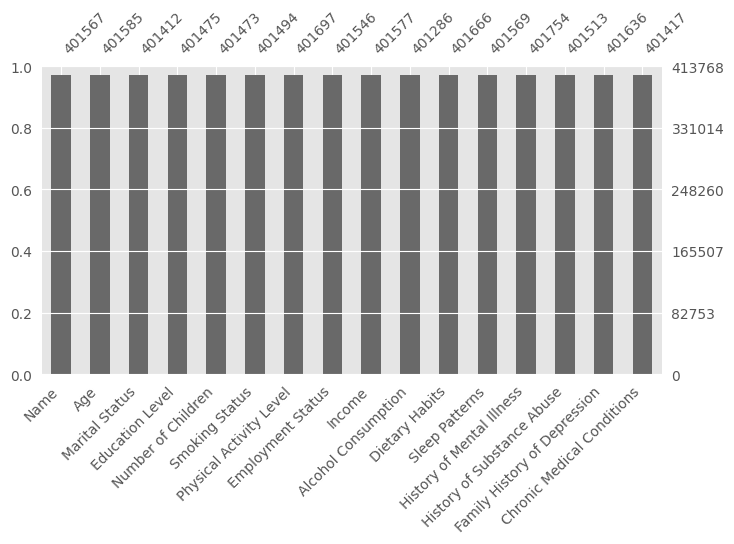

In [22]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

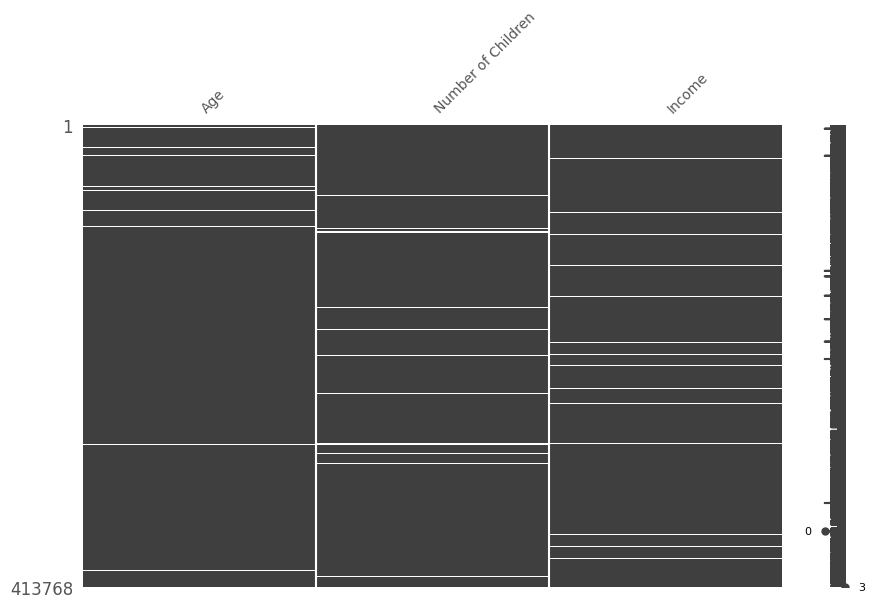

In [23]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['Age', 'Number of Children', 'Income']],
            figsize = (10, 6),
            fontsize = 10);

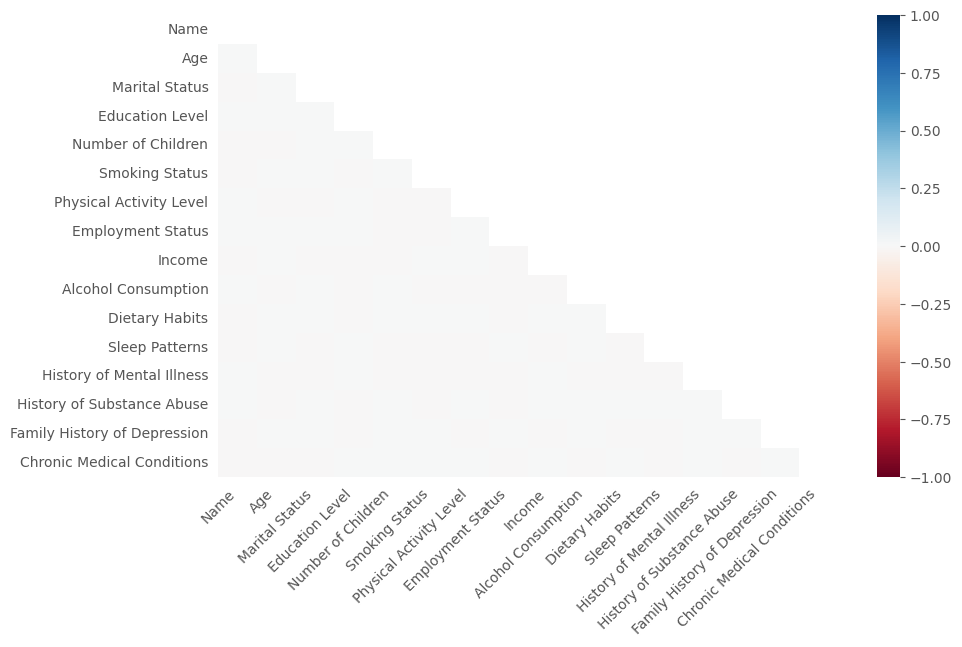

In [24]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

# 4.2 Yöntem 1: Eksik Verilerin Silinmesi
Veri setinde bulunan eksik verilere müdahale yöntemlerinden birisi, eksik verilerin silinmesidir. Uygulaması oldukça kolay bir yöntem olsa da eksik verileri silmeden önce dikkat edilmesi gereken önemli hususlar vardır.

Eksik bir verinin bulunduğu gözlemi silmeya karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir.

Eksik veriler veri setinde kayda değer bir yüzdeyi oluşturuyorsa, eksik verilerin silinmesi durumunda veri setindeki birçok gözlemi kaybedeceğimiz unutulmamalıdır. Bu durumda veri seti içerisinde bize bilgi sağlayabilecek birçok veriyi de kaybetmiş olacağız. Verinin olabildiğince fazla olması, hem analitik yöntemler hem de makine öğrenmesi yöntemleri için oldukça önemli olduğuna göre, veri setinden olabildiğince az kayıp verecek yöntemler denemeliyiz.

In [25]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df.dropna(inplace = False)[:5]
#df = df.dropna()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
7,Charles Kaiser,31.0,Single,High School,0.0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
9,Alexander Hernandez,77.0,Married,Bachelor's Degree,2.0,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No


In [26]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes


In [27]:
# Değişken bazında silmek için;
df.dropna(axis = 1)

""
0
1
2
3
4
...
413763
413764
413765
413766


# 4.3 Yöntem 2: Eksik Verilerin Doldurulması
Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [28]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


In [29]:
df_fillna.isna().sum()

Name                            12201
Age                             12183
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

# 4.3.1 Sayısal Değişkenlerin Doldurulması

In [30]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_Age = df_fillna['Age'].mean()

df_fillna['Age'].fillna(value = mean_Age, inplace = True)

df_fillna.isna().sum()

Name                            12201
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [31]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

In [32]:
df_fillna.isna().sum()

Name                            12201
Age                                 0
Marital Status                  12356
Education Level                 12293
Number of Children                  0
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                              0
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,401585.0,48.999933,18.160828,18.00,33.00,49.00,65.00,80.00
Number of Children,401473.0,1.298690,1.236892,0.00,0.00,1.00,2.00,4.00
Income,401577.0,50656.512581,40626.241790,0.41,20988.84,37508.45,76614.36,209995.22


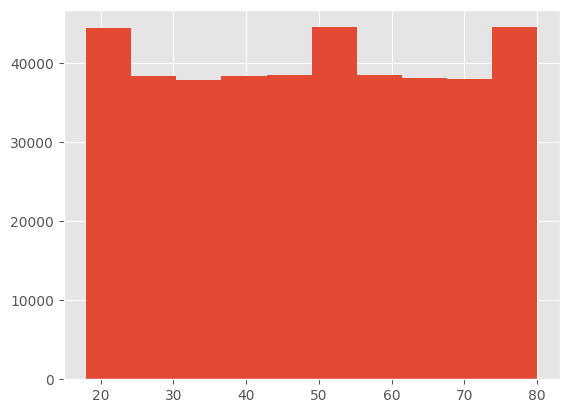

In [34]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['Age'])
plt.show()

# 4.3.2 Kategorik Değişkenlerin Doldurulması

In [35]:
# Name değişkeninde toplam kaç adet eksik değer olduğunu görelim.
print(df_fillna['Name'].isna().sum())

# Name değişkeninde en çok tekrar eden değeri (mode) alalım.
name_mode = df_fillna['Name'].mode()

# Name değişkenini mode değeri ile dolduralım.
df_fillna['Name'] = df_fillna['Name'].fillna(value=name_mode[0])

# Name değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
print(df_fillna['Name'].isna().sum())

12201
0


In [36]:
# History of Mental Illness değişkeninde toplam kaç adet eksik değer olduğunu görelim.
print(df_fillna['History of Mental Illness'].isna().sum())

# History of Mental Illness değişkeninde en çok tekrar eden değeri (mode) alalım.
mental_illness_mode = df_fillna['History of Mental Illness'].mode()

# History of Mental Illness değişkenini mode değeri ile dolduralım.
df_fillna['History of Mental Illness'] = df_fillna['History of Mental Illness'].fillna(value=mental_illness_mode[0])

# History of Mental Illness değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
print(df_fillna['History of Mental Illness'].isna().sum())

12014
0


In [37]:
df_fillna[["Physical Activity Level"]][:20]

,Physical Activity Level
0,Active
1,Sedentary
2,Sedentary
3,Moderate
4,Sedentary
5,Active
6,Sedentary
7,Active
8,Active
9,Sedentary


In [38]:
# Önceki değer ile doldurma işlemi
df_fillna["Physical Activity Level"].fillna(method = "bfill")

0            Active
1         Sedentary
2         Sedentary
3          Moderate
4         Sedentary
            ...    
413763     Moderate
413764       Active
413765    Sedentary
413766    Sedentary
413767     Moderate
Name: Physical Activity Level, Length: 413768, dtype: object

In [39]:
# Sonraki değer ile doldurma işlemi
df_fillna["Physical Activity Level"].fillna(method = "ffill")

0            Active
1         Sedentary
2         Sedentary
3          Moderate
4         Sedentary
            ...    
413763     Moderate
413764       Active
413765    Sedentary
413766    Sedentary
413767     Moderate
Name: Physical Activity Level, Length: 413768, dtype: object

# 4.3.3 Kategorik Kırılım İle Doldurma İşlemi
Burada basitçe mean ve median değerler ile doldurma işlemi yapmış olsak da, eksik veri durumunu bu kadar basit bir şekilde ele almak her zaman doğru olmayacaktır. Bu tarz basit doldurma işlemleri hızlı bir çözüm olarak ele alınmalıdır. Daha analitik bir yaklaşım için veri içerisinde benzetimler uygulayarak doldurma işlemlerini buna göre gerçekleştirebiliriz.ur.ur.

In [40]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

Name                            12201
Age                             12183
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [41]:
df_categorical_fillna["Age"].fillna(value = df_categorical_fillna.groupby("History of Mental Illness")["Age"].transform("mean"),
                                       inplace = True)

In [42]:
df_categorical_fillna.isna().sum()

Name                            12201
Age                               344
Marital Status                  12356
Education Level                 12293
Number of Children              12295
Smoking Status                  12274
Physical Activity Level         12071
Employment Status               12222
Income                          12191
Alcohol Consumption             12482
Dietary Habits                  12102
Sleep Patterns                  12199
History of Mental Illness       12014
History of Substance Abuse      12255
Family History of Depression    12132
Chronic Medical Conditions      12351
dtype: int64

In [43]:
df_categorical_fillna[df_categorical_fillna[["History of Mental Illness", "Age"]].isna().all(axis=1)][["History of Mental Illness", "Age"]]

,History of Mental Illness,Age
1619,NaN,NaN
1970,NaN,NaN
2637,NaN,NaN
3331,NaN,NaN
5359,NaN,NaN
...,...,...
412182,NaN,NaN
412524,NaN,NaN
413092,NaN,NaN
413368,NaN,NaN


In [44]:
df_categorical_fillna[df_categorical_fillna['Age'].isnull()]

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
1619,Hannah Hutchinson,NaN,Married,NaN,2.0,Non-smoker,Moderate,Employed,88031.25,Moderate,Healthy,Fair,NaN,NaN,No,Yes
1970,Megan Huynh MD,NaN,Widowed,Master's Degree,3.0,Non-smoker,Moderate,Employed,106724.22,Low,Healthy,Good,NaN,Yes,Yes,Yes
2637,Miguel Stevens,NaN,Married,NaN,2.0,Former,Active,Employed,60683.34,Moderate,Unhealthy,Fair,NaN,No,No,Yes
3331,Michael Kim,NaN,Married,Bachelor's Degree,NaN,Former,Moderate,Employed,99784.88,Moderate,Moderate,Fair,NaN,Yes,Yes,No
5359,Jared Rowe,NaN,Divorced,High School,1.0,Former,Sedentary,Employed,40023.55,Moderate,Moderate,Good,NaN,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412182,Vanessa Burns,NaN,Married,High School,2.0,Non-smoker,Moderate,Employed,43620.93,Low,Unhealthy,Fair,NaN,No,No,No
412524,Thomas Rodriguez,NaN,Married,Bachelor's Degree,2.0,Non-smoker,Sedentary,Unemployed,19610.30,Moderate,Moderate,Poor,NaN,Yes,No,No
413092,Samuel Jefferson,NaN,Single,NaN,0.0,Current,Moderate,Unemployed,13455.54,Low,Unhealthy,Good,NaN,Yes,No,No
413368,Shane Wallace,NaN,Single,High School,0.0,Current,Sedentary,Employed,34570.14,Moderate,Moderate,Fair,NaN,No,NaN,No


# 4.3.4 Makine Öğrenmesi ile Değer Atama Teknikleri
Makine öğrenmesi yöntemleri kullanarak da eksik verileri doldurmak mümkündür. Makine Öğrenmesi modelleri bu bootcamp'in konusu olmadığı için detaylı bir anlatım gerçekleştirilmeyecektir.

Hangi yöntemler kullanılabilir?:

KNNImputer (K-Nearest Neighbor)
Random Forest Classifier
Google -> "How can I fill missing values by using Machine Learning techniques in Python?", "Python ile eksik verileri Makine Öğrenmesi teknikleri kullanarak nasıl doldurabilirim?"

# 5. Kategorik Değişken Analizi

In [45]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

# 5.1 Kategorik Değişken İşlemleri

In [46]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Name,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,Married,Bachelor's Degree,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,Married,High School,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,Widowed,Master's Degree,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No


In [47]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["Education Level"].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [48]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 196851 unique values in "Name" categorical feature.

There are 4 unique values in "Marital Status" categorical feature.

There are 5 unique values in "Education Level" categorical feature.

There are 3 unique values in "Smoking Status" categorical feature.

There are 3 unique values in "Physical Activity Level" categorical feature.

There are 2 unique values in "Employment Status" categorical feature.

There are 3 unique values in "Alcohol Consumption" categorical feature.

There are 3 unique values in "Dietary Habits" categorical feature.

There are 3 unique values in "Sleep Patterns" categorical feature.

There are 2 unique values in "History of Mental Illness" categorical feature.

There are 2 unique values in "History of Substance Abuse" categorical feature.

There are 2 unique values in "Family History of Depression" categorical feature.

There are 2 unique values in "Chronic Medical Conditions" categorical feature.



In [49]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64
 *********************************************
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64
 *********************************************
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64
 *********************************************
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64
 *********************************************
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64

In [50]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["Sleep Patterns"].unique().tolist()[::-1]
comp_categories

['Poor', 'Good', 'Fair']

In [51]:
from pandas.api.types import CategoricalDtype

df["Sleep Patterns"] = df["Sleep Patterns"].astype(CategoricalDtype(categories = comp_categories, ordered = True))

In [52]:
df["Sleep Patterns"].head()

0    Fair
1    Fair
2    Good
3    Poor
4    Fair
Name: Sleep Patterns, dtype: category
Categories (3, object): ['Poor' < 'Good' < 'Fair']

In [53]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (413768, 16)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Name,object,0,0.0,0,196851,413768,NaN,NaN,NaN,NaN,Christine Barker,Jacqueline Lewis,Shannon Church
Age,int64,0,0.0,0,63,413768,18.0,80.0,49.000713,18.158759,31,55,78
Marital Status,object,0,0.0,0,4,413768,NaN,NaN,NaN,NaN,Married,Married,Widowed
Education Level,object,0,0.0,0,5,413768,NaN,NaN,NaN,NaN,Bachelor's Degree,High School,Master's Degree
Number of Children,int64,0,0.0,0,5,413768,0.0,4.0,1.298972,1.237054,2,1,1
Smoking Status,object,0,0.0,0,3,413768,NaN,NaN,NaN,NaN,Non-smoker,Non-smoker,Non-smoker
Physical Activity Level,object,0,0.0,0,3,413768,NaN,NaN,NaN,NaN,Active,Sedentary,Sedentary
Employment Status,object,0,0.0,0,2,413768,NaN,NaN,NaN,NaN,Unemployed,Employed,Employed
Income,float64,0,0.0,0,405282,413768,0.41,209995.22,50661.707971,40624.100565,26265.67,42710.36,125332.79
Alcohol Consumption,object,0,0.0,0,3,413768,NaN,NaN,NaN,NaN,Moderate,High,Low


# 5.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

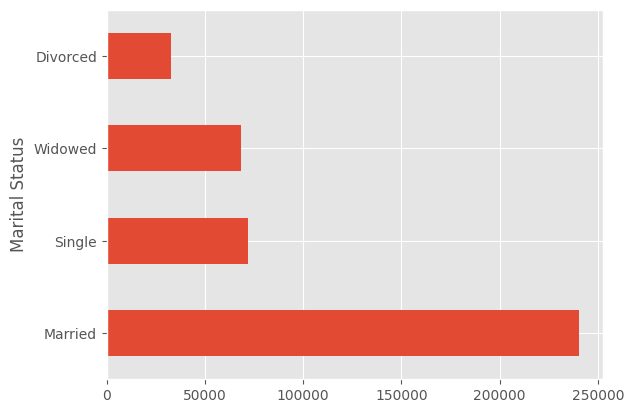

In [54]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['Marital Status'].value_counts().plot.barh();

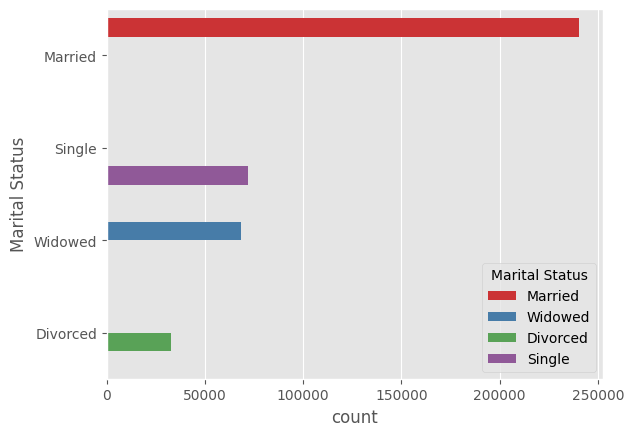

In [55]:
sns.countplot(data = df,
              y = "Marital Status",
              hue = "Marital Status",
              order = df["Marital Status"].value_counts().index,
              palette = "Set1");

**sigara içenler**

In [56]:
smokers = df["Smoking Status"].value_counts()
smokers 

Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64

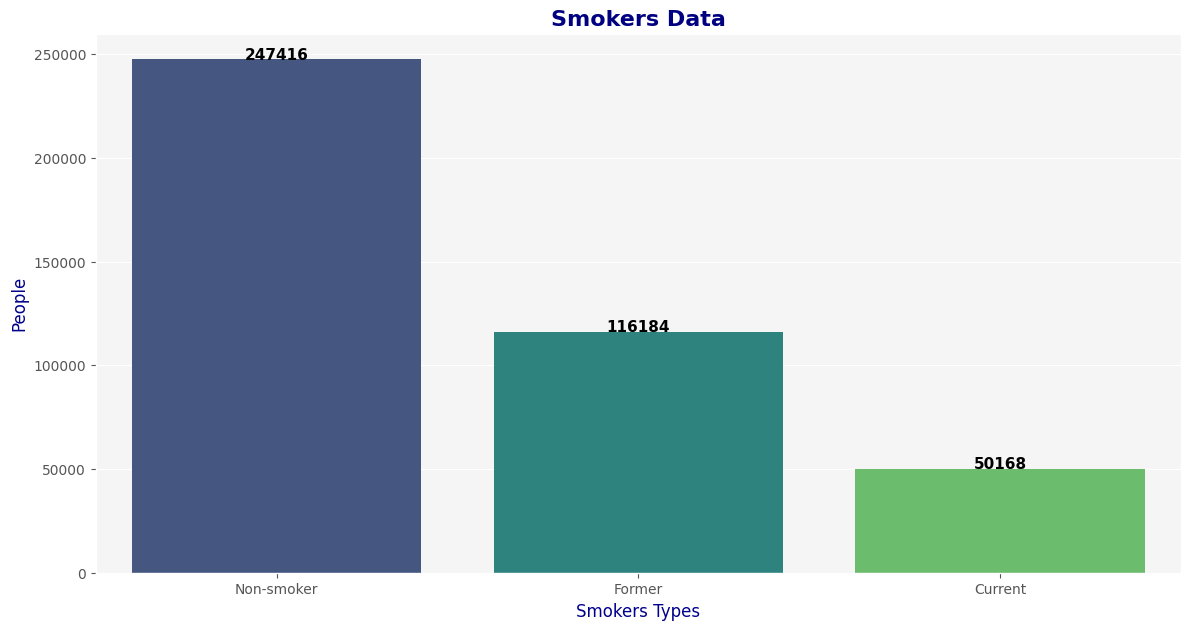

In [57]:
smokers_df = smokers.reset_index()
smokers_df.columns = ['Smoking Status', 'Total Value']
plt.figure(figsize=(14,7))
smok_plot = sns.barplot(x="Smoking Status", y="Total Value", data=smokers_df,palette='viridis')
for i, value in enumerate(smokers_df['Total Value']):
    plt.text(i, value + 2, f'{value}', ha='center', color='black', fontsize=11, fontweight='bold')
plt.title("Smokers Data", weight='bold', fontsize=16, color='navy')
plt.xlabel("Smokers Types", fontsize=12, color='darkblue')
plt.ylabel("People", fontsize=12, color='darkblue')

plt.gca().set_facecolor('whitesmoke')
plt.show()


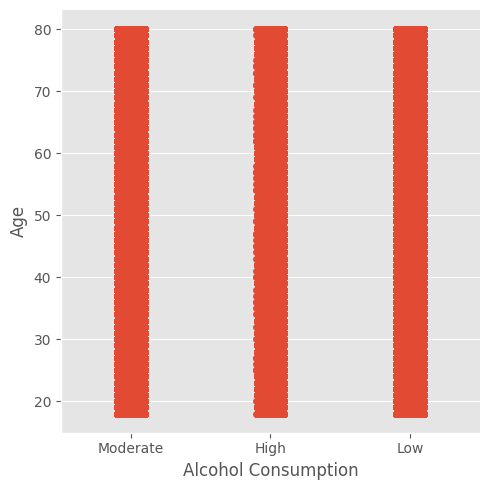

In [58]:
sns.catplot(data = df,
            x = "Alcohol Consumption",
            y = "Age");

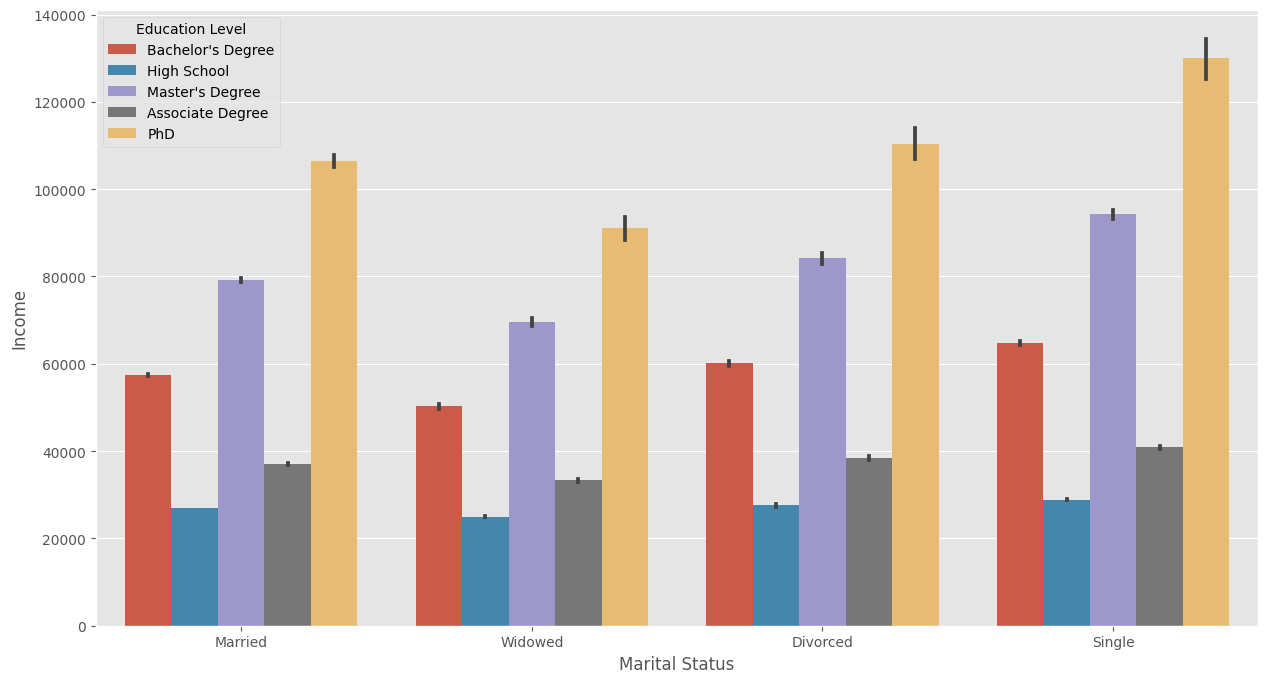

In [59]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "Marital Status",
            y = "Income",
            hue = "Education Level");

# 5.3 Kategorik Gruplama (groupby) İşlemleri

In [60]:
df_usd = df.groupby(by = "Physical Activity Level")["Income"].mean().to_frame().reset_index().sort_values(by = "Income", ascending = False)

df_usd

,Physical Activity Level,Income
0,Active,51475.920203
1,Moderate,50922.558445
2,Sedentary,50065.365410


In [61]:
df.groupby(by = ['Physical Activity Level', 'Alcohol Consumption'])['Income'].mean().to_frame().reset_index().sort_values(by = "Income", ascending = False)[:5]

,Physical Activity Level,Alcohol Consumption,Income
5,Moderate,Moderate,53633.983398
2,Active,Moderate,53295.916031
0,Active,High,50770.662863
6,Sedentary,High,50233.929308
7,Sedentary,Low,50009.204339


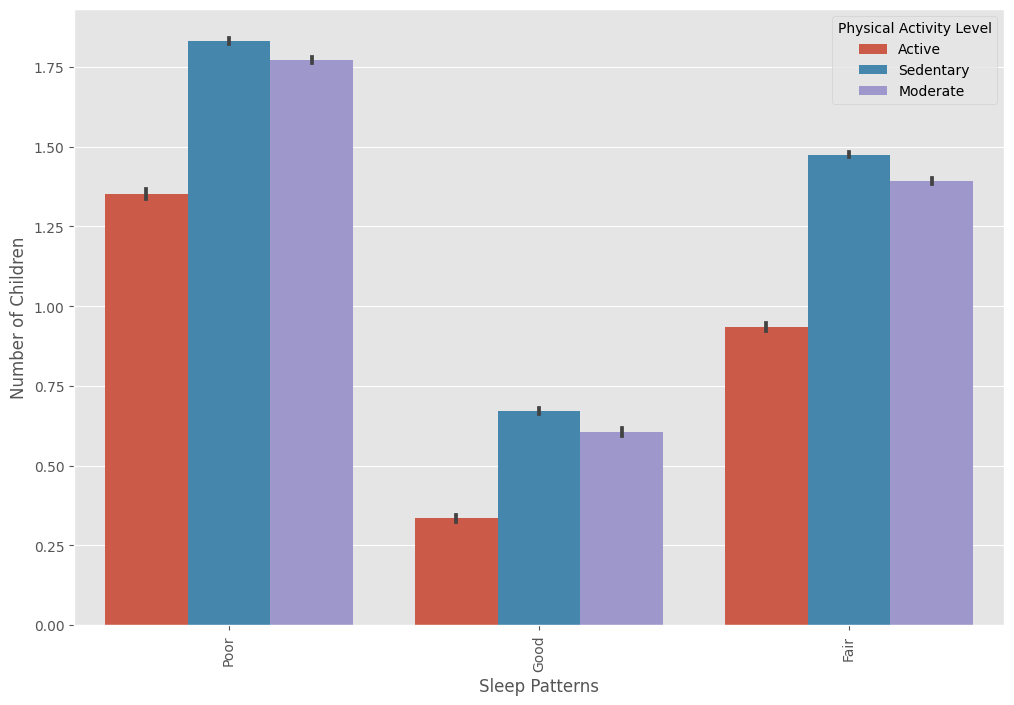

In [62]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "Sleep Patterns", y = "Number of Children", hue = "Physical Activity Level");

In [63]:

# Marital Status'a göre Physical Activity Level dağılımını alıyoruz
df_status = (
    df.groupby(by="Marital Status")["Physical Activity Level"]
    .value_counts()
    .to_frame(name="Counts")  # 'Counts' adında yeni bir sütun oluşturuyoruz
    .reset_index()
)

# Bekar bireyler için filtreleme
df_status = df_status[df_status["Marital Status"] == "Single"]

# Sonuçları görmek
print(df_status)

  Marital Status Physical Activity Level  Counts
6         Single                  Active   32186
7         Single                Moderate   22984
8         Single               Sedentary   16940


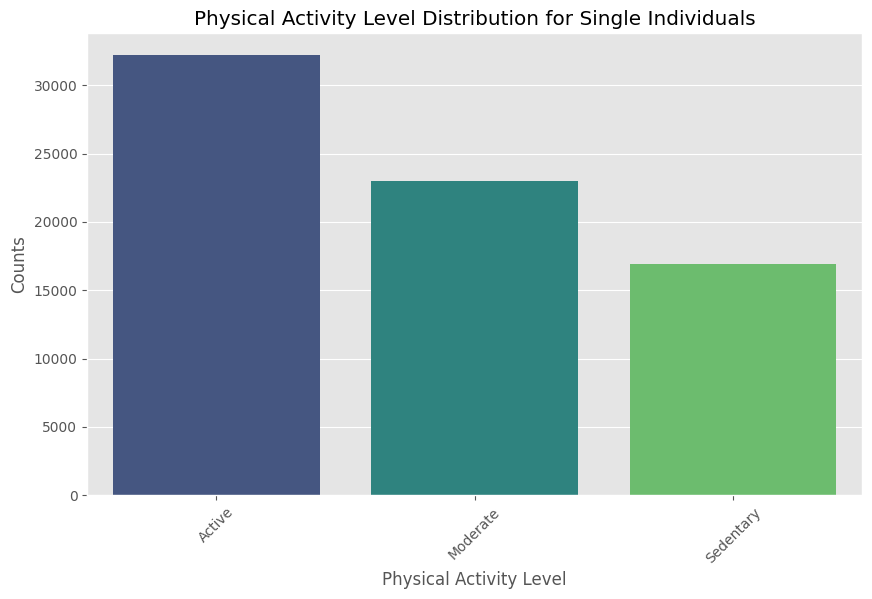

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Barplot
sns.barplot(
    data=df_status,
    x="Physical Activity Level",  # X eksenine fiziksel aktivite seviyelerini koyuyoruz
    y="Counts",                   # Y eksenine dağılım sayısını koyuyoruz
    palette="viridis"             # Renk paleti seçimi
)

plt.title("Physical Activity Level Distribution for Single Individuals")
plt.xlabel("Physical Activity Level")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# 6. Sürekli Değişken Analizi

# 6.1 Sürekli Değişkenlerin İncelenmesi

In [65]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Age,Number of Children,Income
0,31,2,26265.67
1,55,1,42710.36
2,78,1,125332.79
3,58,3,9992.78
4,18,0,8595.08


In [66]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,413768.0,49.000713,18.158759,18.00,33.00,49.000,65.0,80.00
Number of Children,413768.0,1.298972,1.237054,0.00,0.00,1.000,2.0,4.00
Income,413768.0,50661.707971,40624.100565,0.41,21001.03,37520.135,76616.3,209995.22


In [67]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")
give_stats(dataframe = df)

**********Age**********
Mean value of Age is 49.00
Std value of Age is 18.16
Max value of Age is 80
Min value of Age is 18
Count value of Age is 413768
Median value of Age is 49.0

**********Number of Children**********
Mean value of Number of Children is 1.30
Std value of Number of Children is 1.24
Max value of Number of Children is 4
Min value of Number of Children is 0
Count value of Number of Children is 413768
Median value of Number of Children is 1.0

**********Income**********
Mean value of Income is 50661.71
Std value of Income is 40624.10
Max value of Income is 209995.22
Min value of Income is 0.41
Count value of Income is 413768
Median value of Income is 37520.134999999995



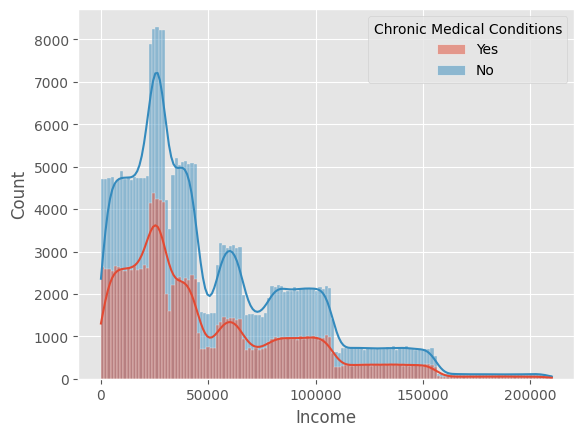

In [68]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "Income", kde = True, hue = "Chronic Medical Conditions");

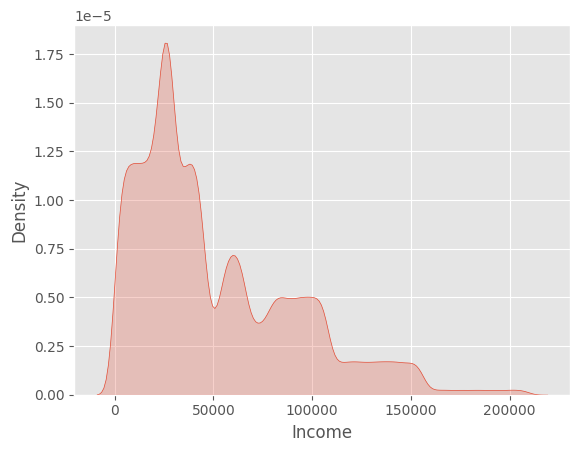

In [69]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['Income'], fill = True);

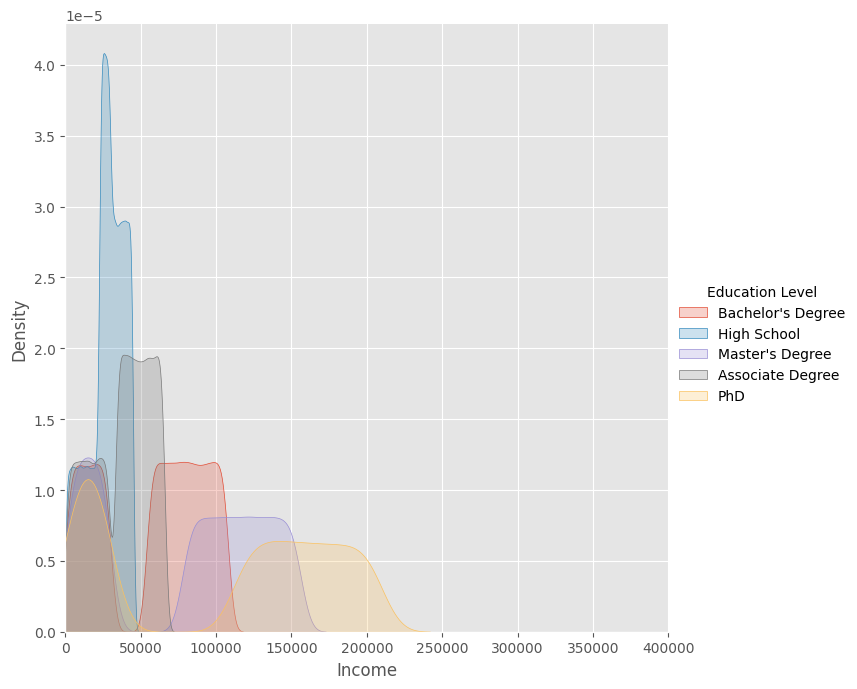

In [70]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data = df,
              hue = "Education Level",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "Income", fill = True).add_legend();

<Figure size 1200x800 with 0 Axes>

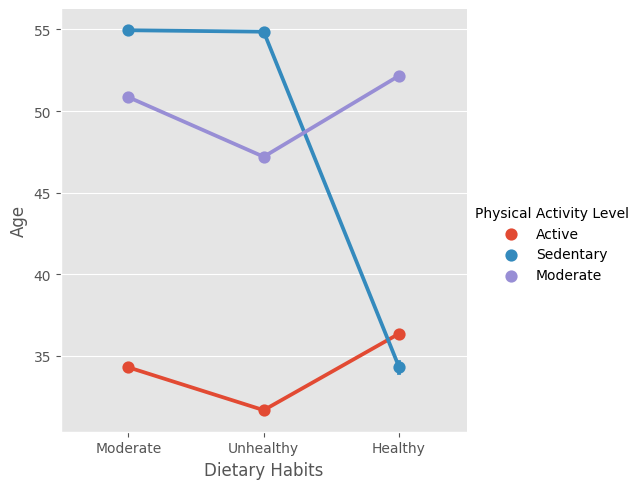

In [71]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "Dietary Habits", y = "Age", hue = "Physical Activity Level", kind = "point");

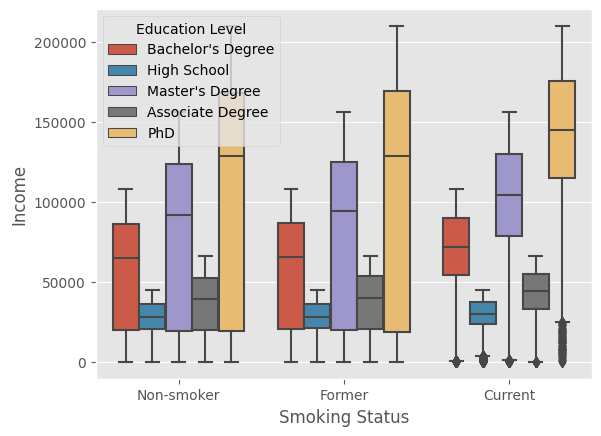

In [72]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "Smoking Status",
            y = "Income",
            hue = "Education Level");

In [73]:
# Farklı numerik görselleştirme işlemleri için iris veri setini yükleyelim.
iris = sns.load_dataset(name = "iris")
iris[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


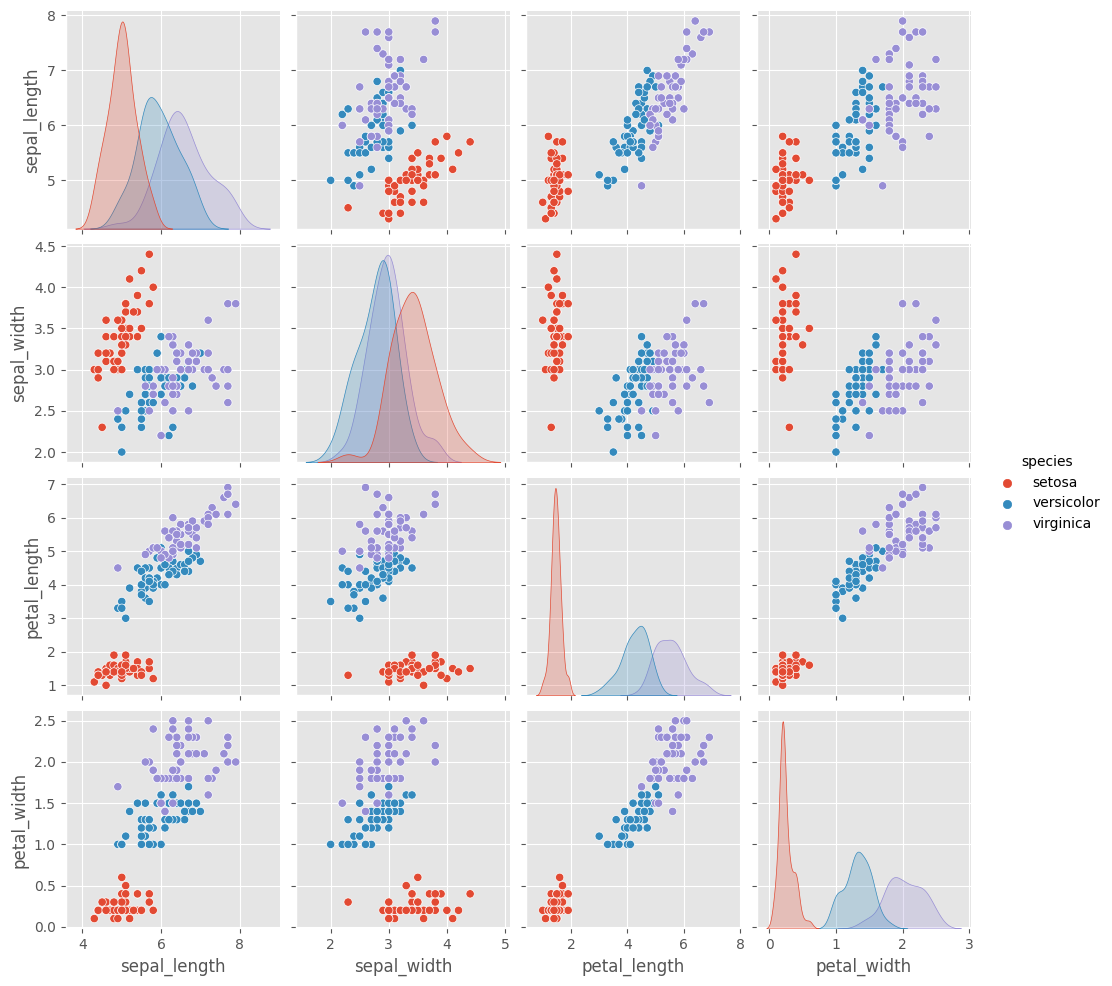

In [74]:
# pairplot numerik değişkenler arasındaki saçılım ve yoğunluk ilişkilerini gösterir.
sns.pairplot(data = iris, hue = "species");

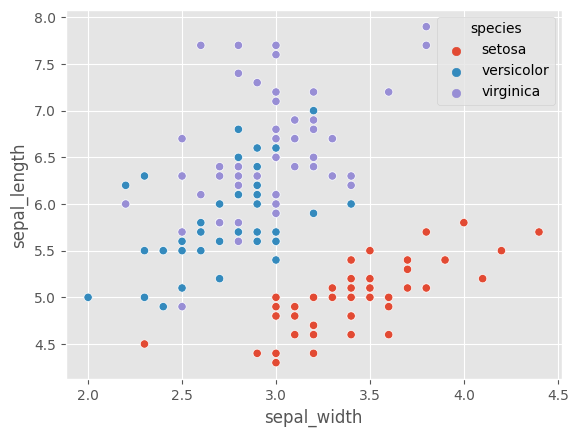

In [75]:
# Scatter Plot, numerik değişkenler arasındaki saçılım ilişkisini gösterir.
sns.scatterplot(data = iris,
                x = "sepal_width",
                y = "sepal_length",
                hue = "species");

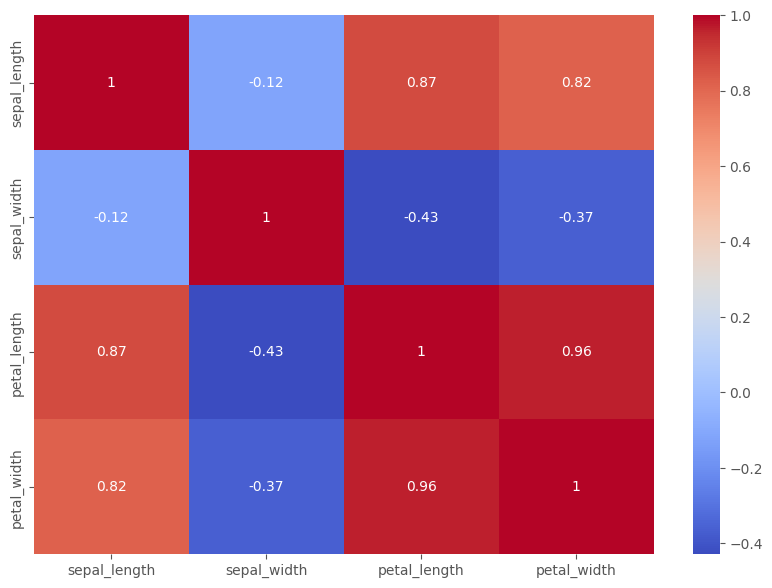

In [76]:
# Heatmap ise corr() (korelasyon) methodu ile kullanıldığında numerik değerler arasındaki ilişki kuvvetini gösterir.
plt.figure(figsize = (10, 7))
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True, cmap = "coolwarm");

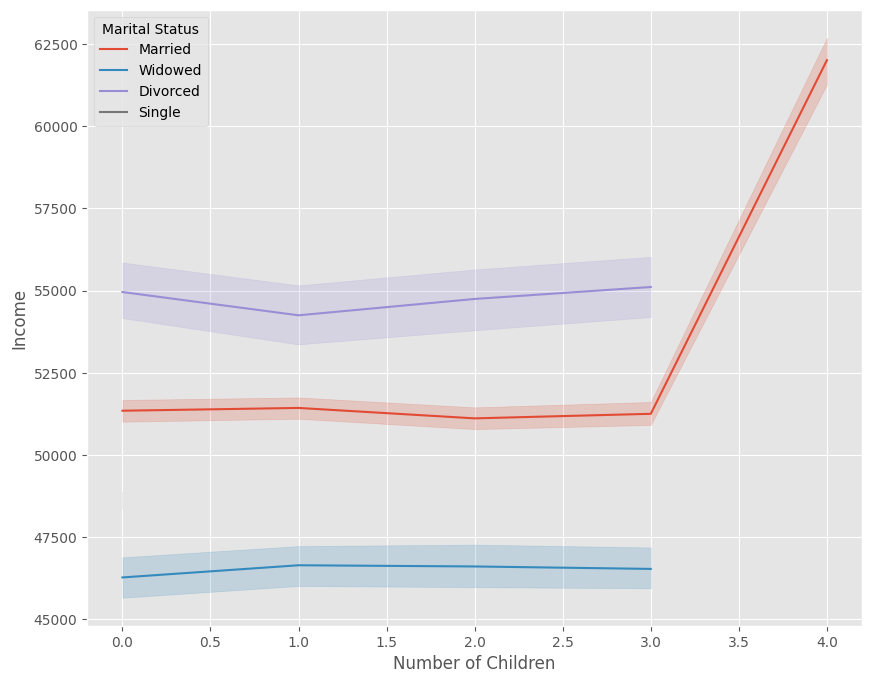

In [77]:
# Çizgi grafik ile numerik değişkenlerin tarihsel olarak değişimini gözlemleyebiliriz.
plt.figure(figsize = (10, 8))
sns.lineplot(data = df,
             x = "Number of Children",
             y = "Income",
             hue = "Marital Status");
# Yarı saydam alanlar, güven aralığını (confidence interval) temsil eder. 

# 7. Aykırı Değer Analizi (Outliers)
Aykırı değerlerin analizi de tıpkı eksik verilerde olduğu gibi hassasiyetle değerlendirilmelidir. Aykırı değerlerin varlığı veri setindeki dağılımları etkileyeceği için, aykırı değere sahip bir veri setiyle tahmin modeli oluşturduğumuzda modelimizin genellenebilirliğinin düşmesine sebep olacaktır.

Aykırı değerlerin değerlendirilmesi için sektörel bilgi, standart sapma yaklaşımı, Z-skoru, IQR yöntemi gibi yöntemler kullanılabilir. Biz burada IQR yöntemi ile basitçe bir düzeltme işlemi uygulayacağız.

In [78]:
df = df_.copy()

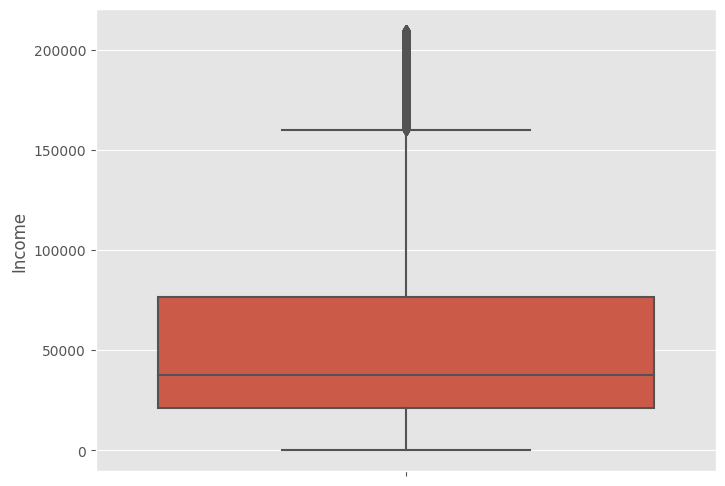

In [79]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["Income"],
            orient = "v");

In [80]:
df_income = df['Income']
df_income

0          26265.67
1          42710.36
2         125332.79
3           9992.78
4           8595.08
            ...    
413763    109233.43
413764     96760.97
413765     77353.26
413766     24557.08
413767    107125.74
Name: Income, Length: 413768, dtype: float64

In [81]:
# Quantile değerlerin belirlenmesi.
Q1 = df_income.quantile(0.25)
Q3 = df_income.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

21001.03
76616.3
55615.270000000004


In [82]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_income[df_income > upper_fence].index

outlier_idx

Index([    15,    105,    170,    193,    319,    328,    342,    632,    664,
          670,
       ...
       412834, 412937, 413059, 413175, 413305, 413461, 413563, 413574, 413577,
       413754],
      dtype='int64', length=5157)

In [83]:
df_income[df_income > upper_fence]

15        202449.17
105       169400.38
170       180084.56
193       193843.44
319       177029.40
            ...    
413461    200828.61
413563    164436.49
413574    171921.83
413577    169051.46
413754    185657.43
Name: Income, Length: 5157, dtype: float64

# 7.1 Aykırı Gözlemlerin Silinmesi

In [84]:
df_del = df[~(df_income > upper_fence)]

df_del

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


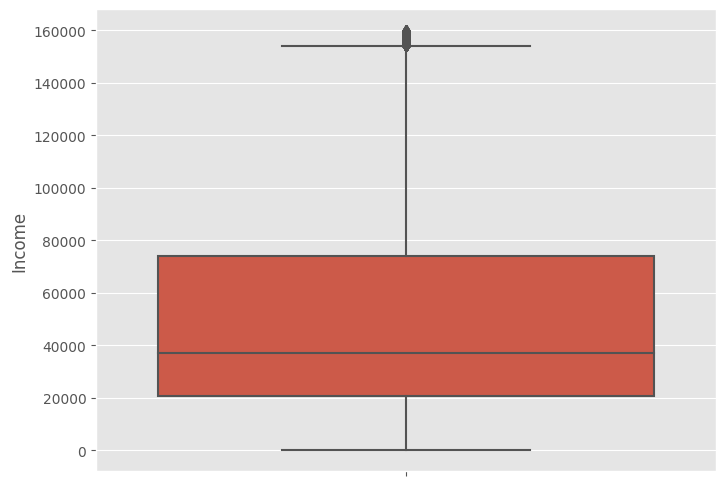

In [85]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["Income"],
            orient = "v");


# 7.2 Aykırı Gözlemlerin Doldurulması

# 7.2.1 Ortalama Değer İle Doldurma

In [86]:
df.loc[df_income > upper_fence, "Income"] = df_income.mean()

In [87]:
df.loc[df_income > upper_fence, "Income"]

Series([], Name: Income, dtype: float64)

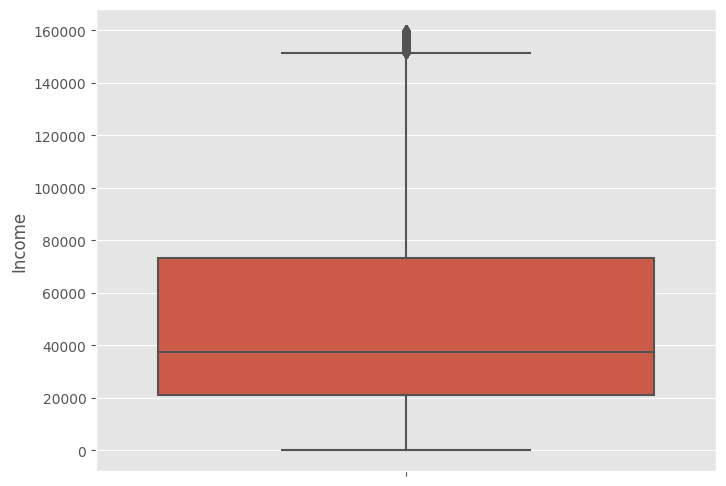

In [88]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["Income"],
            orient = "v");

# 7.2.2 Baskılama Yöntemi

In [89]:
df = df_.copy()

In [90]:
df.loc[df_income > upper_fence, "Income"] = upper_fence

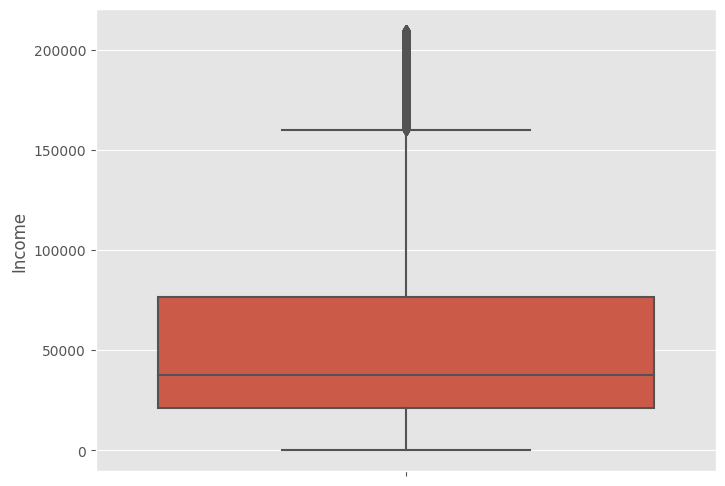

In [91]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["Income"],
            orient = "v");

# 8. Feature Engineering

In [92]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [93]:
from sklearn.preprocessing import LabelEncoder  # LabelEncoder sınıfını içe aktarır
lb = LabelEncoder()  # LabelEncoder nesnesini oluşturur
objList = df.select_dtypes(include="object").columns
for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))

<Axes: >

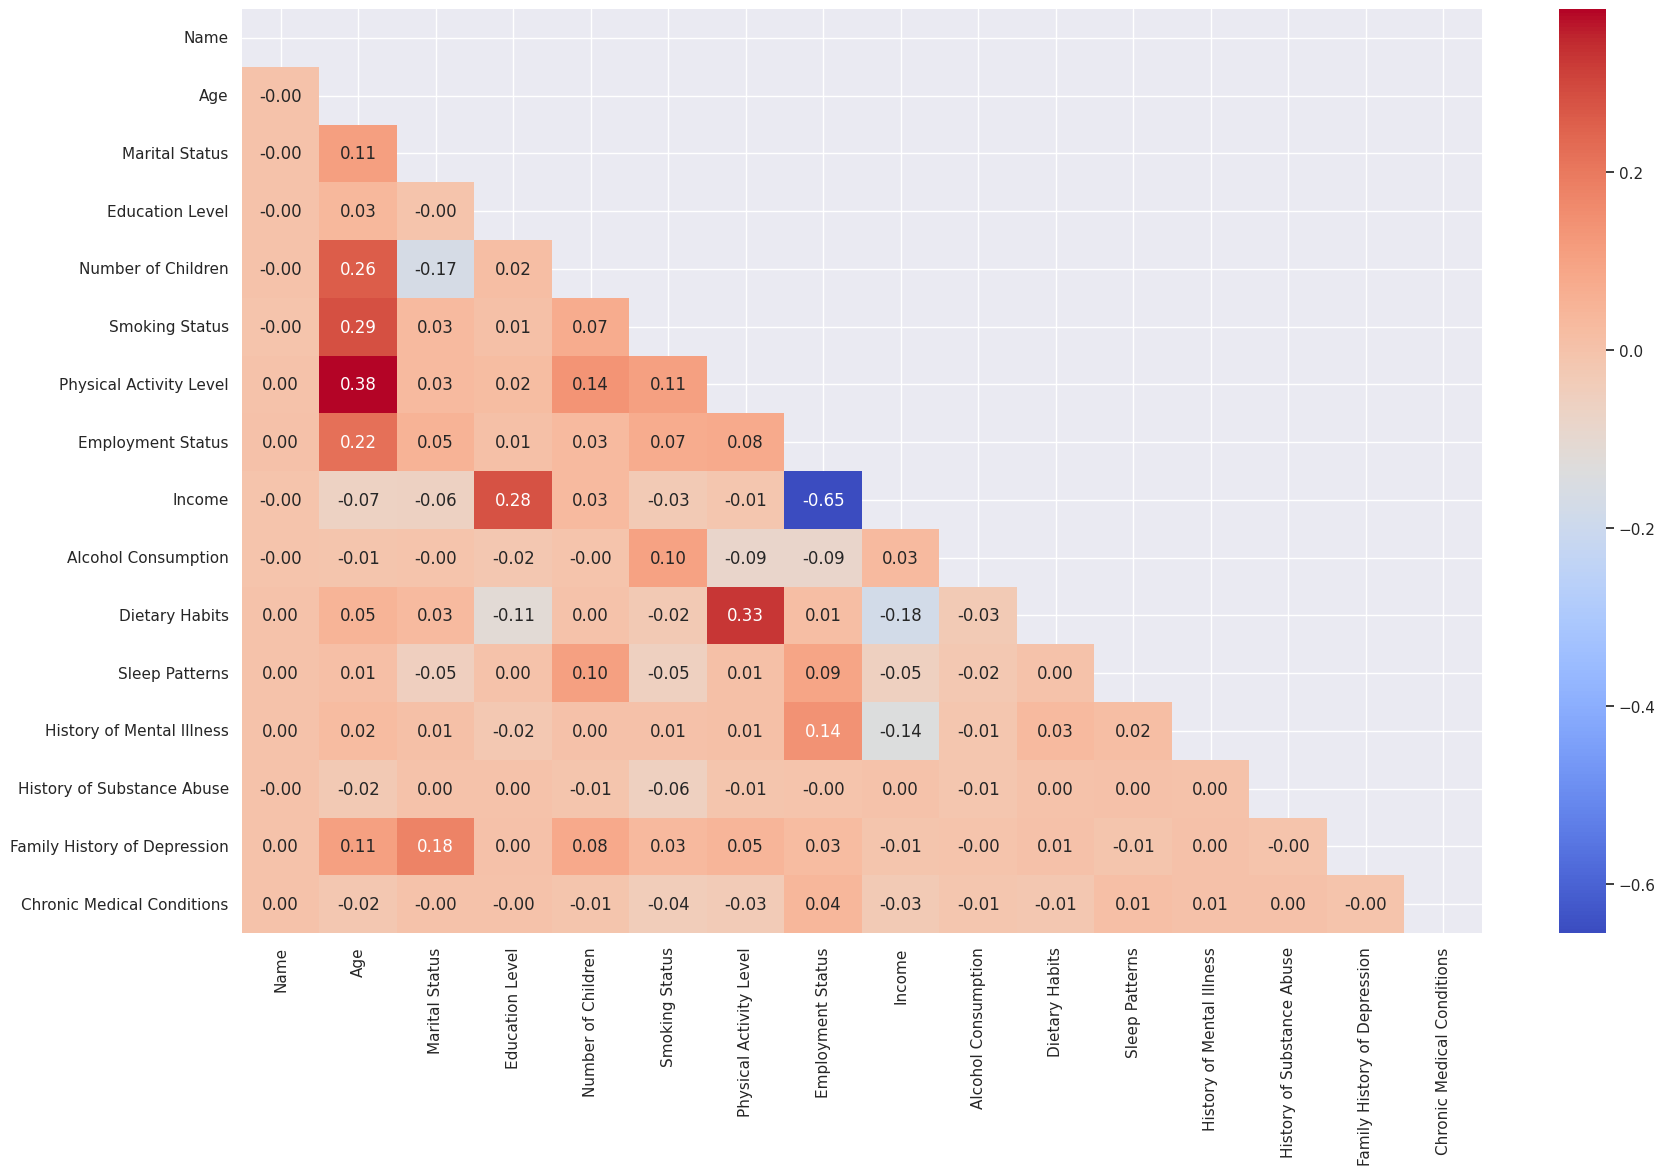

In [94]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize': (20, 12)})

sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f")


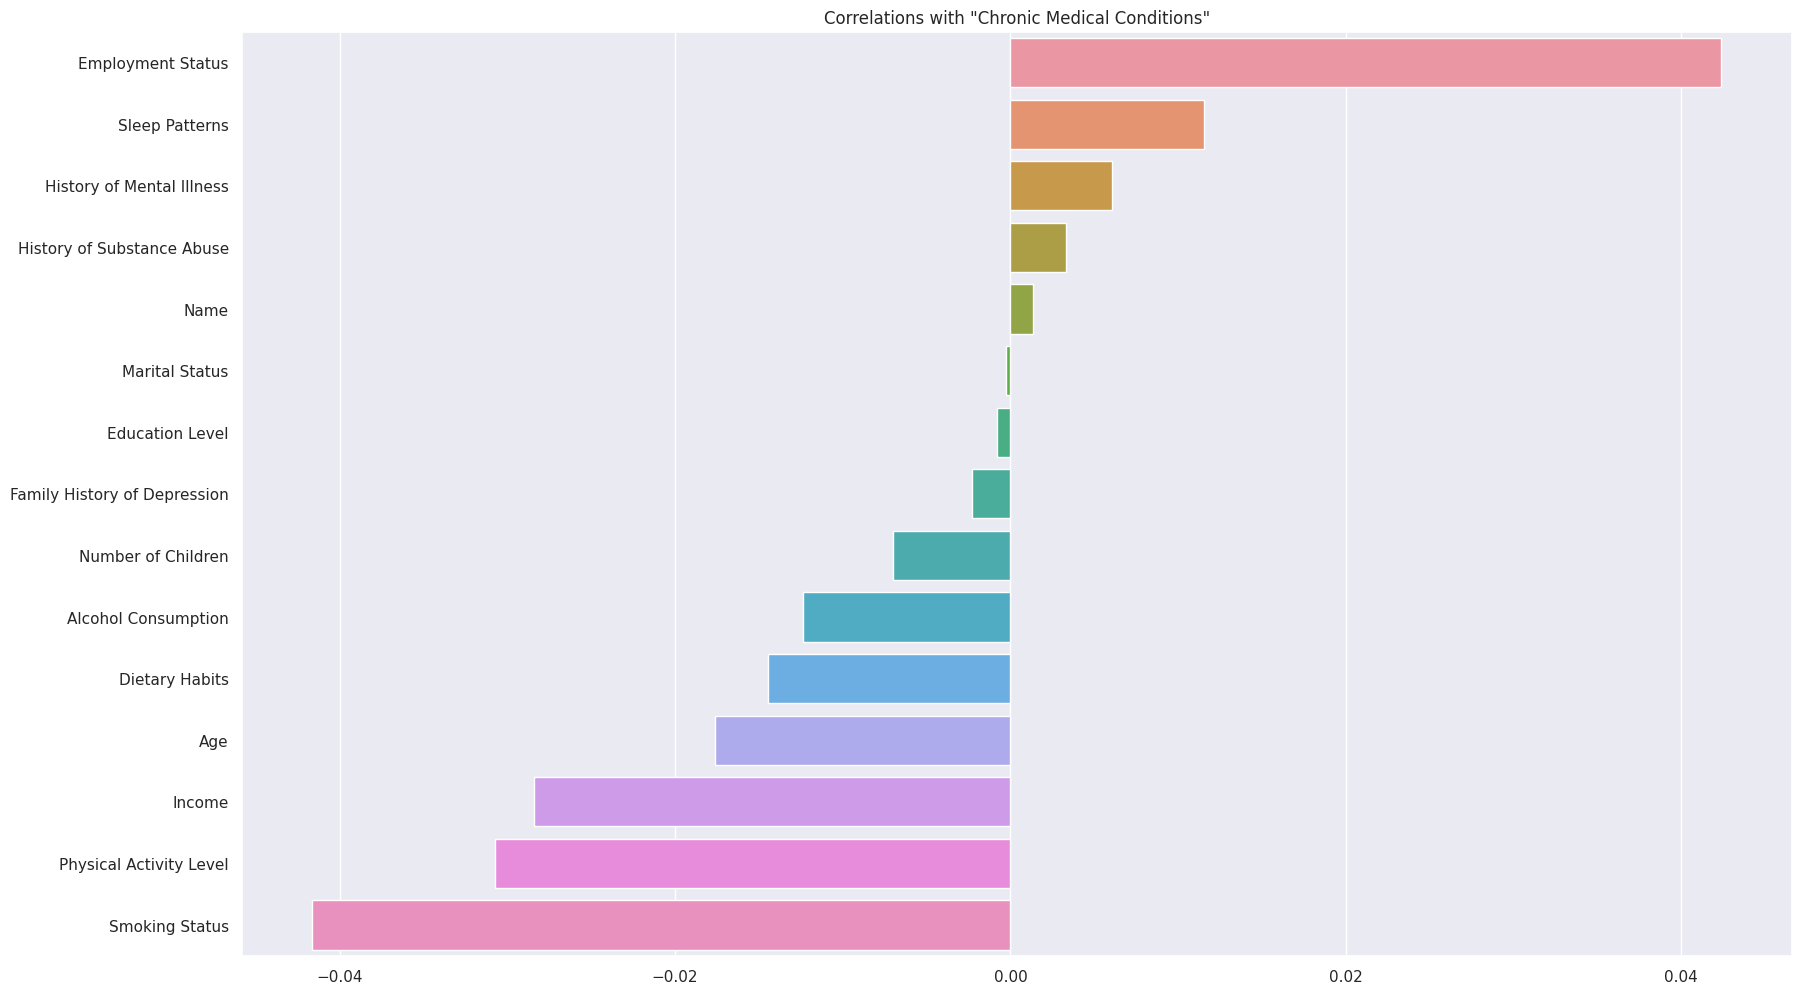

In [95]:
# Correlations

limit = -1.0

data = df.corr()["Chronic Medical Conditions"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Chronic Medical Conditions"')
plt.show()

# EDA

In [96]:
df_yes = df[df['Chronic Medical Conditions'] == 'Yes']
df_no = df[df['Chronic Medical Conditions'] == 'No']


def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio(%)": 100 * dataframe[col_name].value_counts() / len(dataframe),
                        "Yes(%)": 100 *df_yes.groupby(col_name)[col_name].value_counts() / len(df_yes),
                        "No(%)": 100 * df_no.groupby(col_name)[col_name].value_counts() / len(df_no)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

In [97]:
def num_summary(dataframe, numerical_col, plot=False):

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

            print("______________________________________________________\n")

In [98]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

Marital Status

                Marital Status   Ratio(%)  Yes(%)  No(%)
Marital Status                                          
0                        32729   7.909988     NaN    NaN
1                       240444  58.110825     NaN    NaN
2                        72110  17.427641     NaN    NaN
3                        68485  16.551546     NaN    NaN


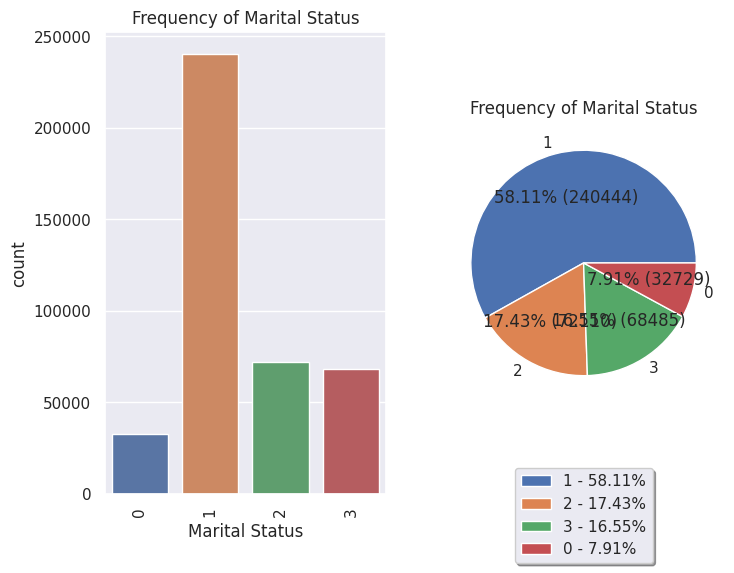

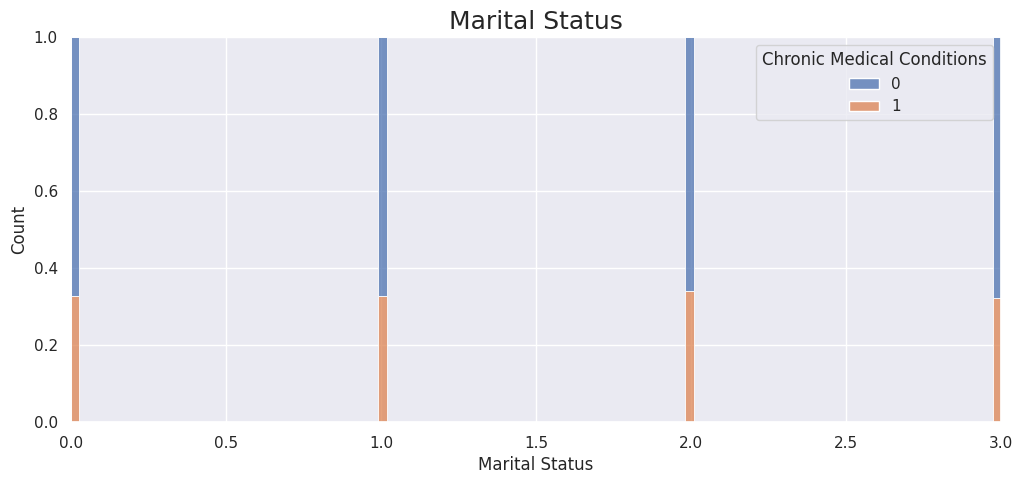

In [99]:
cat_summary(df, "Marital Status", True)

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x="Marital Status", hue="Chronic Medical Conditions", multiple="fill")
plt.title("Marital Status", fontsize = 18)
plt.show()

Age

                                  Age
Chronic Medical Conditions           
0                           49.224916
1                           48.543834




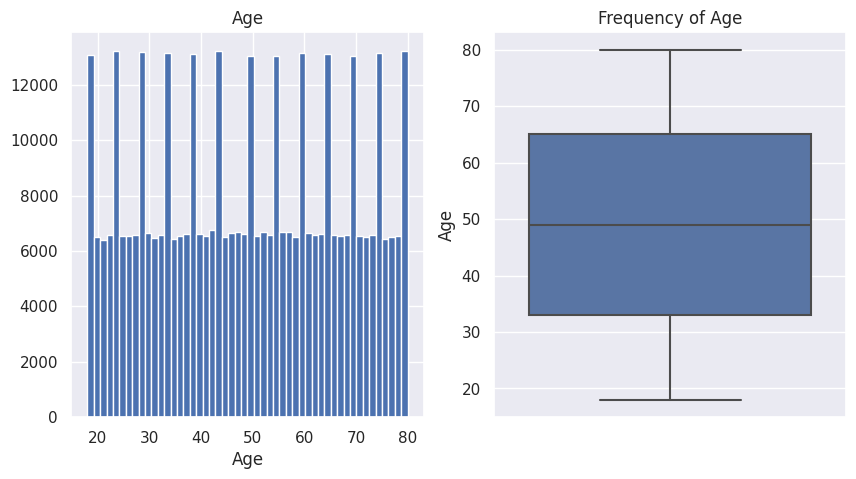

______________________________________________________



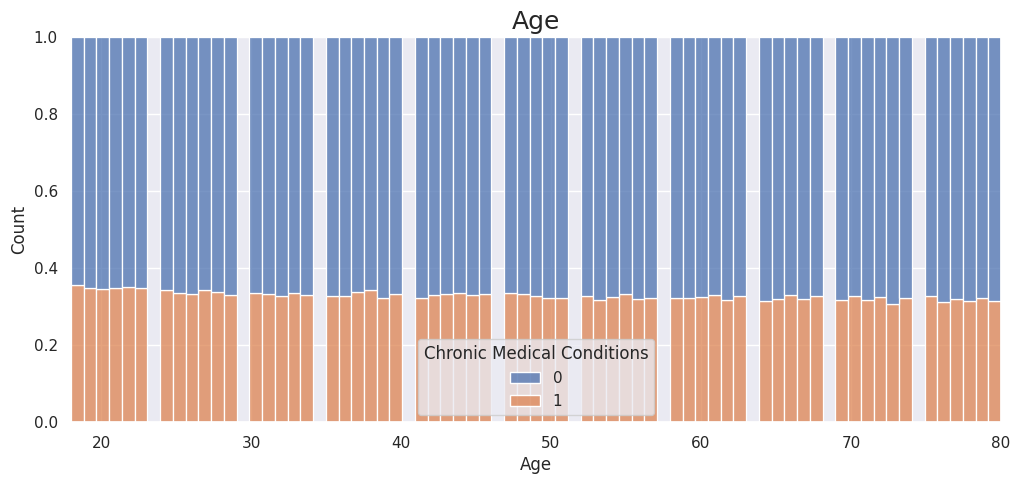

In [100]:
target_summary_with_num(df, "Chronic Medical Conditions", "Age")

num_summary(df, 'Age', plot=True)

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x="Age", hue="Chronic Medical Conditions", multiple="fill")
plt.title("Age", fontsize = 18)
plt.show()

Education Level

                 Education Level   Ratio(%)  Yes(%)  No(%)
Education Level                                           
0                          79999  19.334265     NaN    NaN
1                         124329  30.047998     NaN    NaN
2                         118927  28.742435     NaN    NaN
3                          73768  17.828348     NaN    NaN
4                          16745   4.046954     NaN    NaN


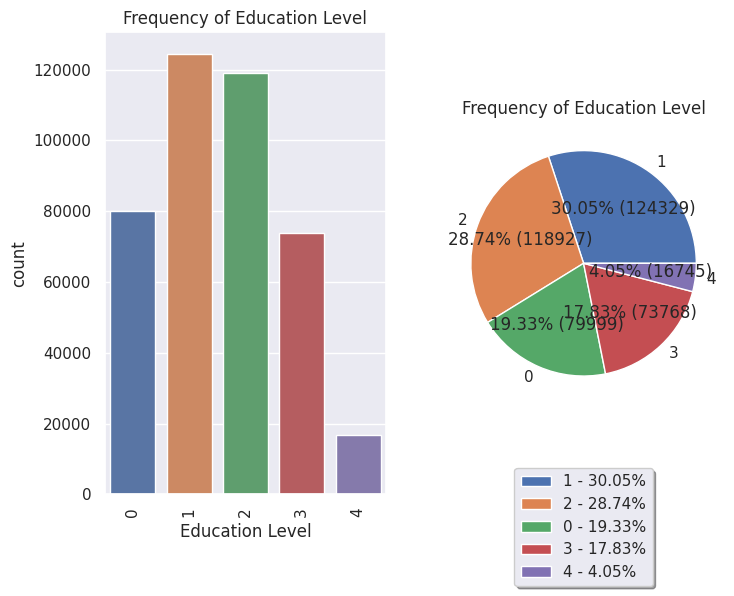

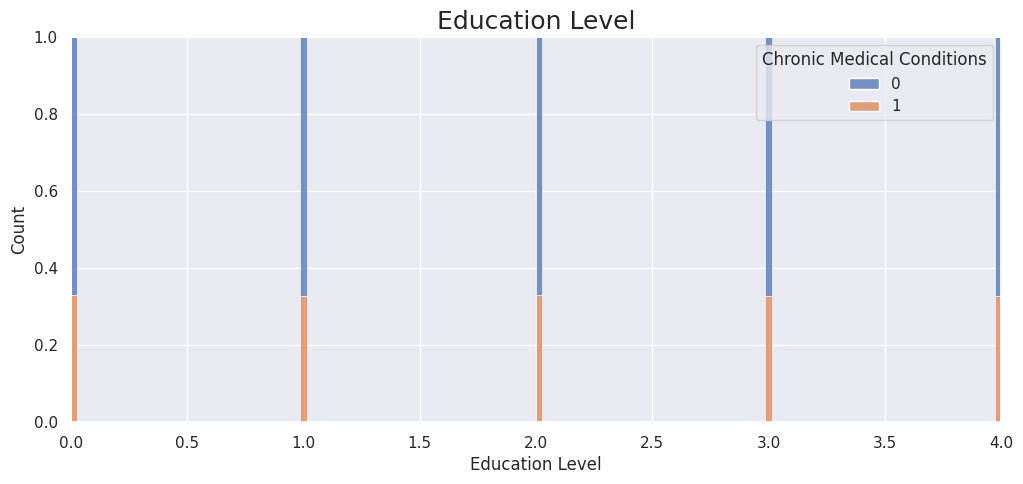

In [101]:
cat_summary(df, "Education Level", True)

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x="Education Level", hue="Chronic Medical Conditions", multiple="fill")
plt.title("Education Level", fontsize = 18)
plt.show()

Number od Children

                            Number of Children
Chronic Medical Conditions                    
0                                     1.305036
1                                     1.286615




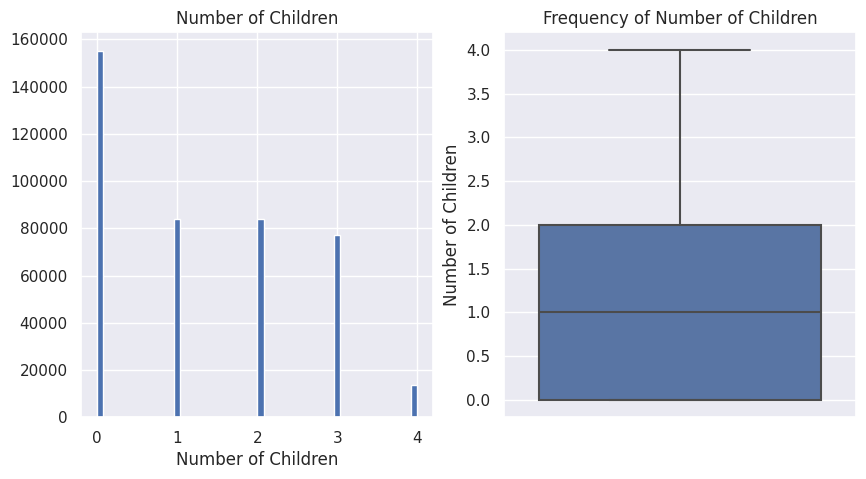

______________________________________________________



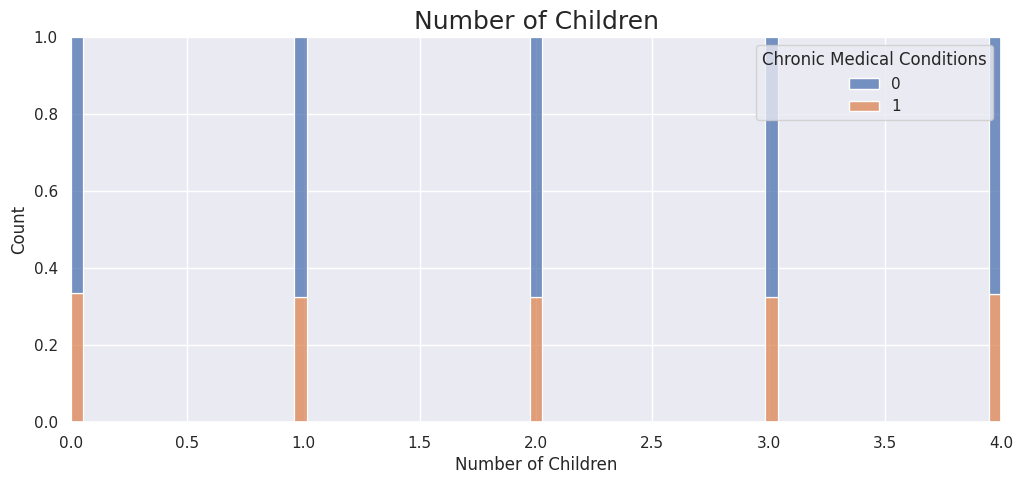

In [102]:
target_summary_with_num(df, "Chronic Medical Conditions", "Number of Children")

num_summary(df, 'Number of Children', plot=True)

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x="Number of Children", hue="Chronic Medical Conditions", multiple="fill")
plt.title("Number of Children", fontsize = 18)
plt.show()

Smoking Status

                Smoking Status   Ratio(%)  Yes(%)  No(%)
Smoking Status                                          
0                        50168  12.124669     NaN    NaN
1                       116184  28.079503     NaN    NaN
2                       247416  59.795828     NaN    NaN


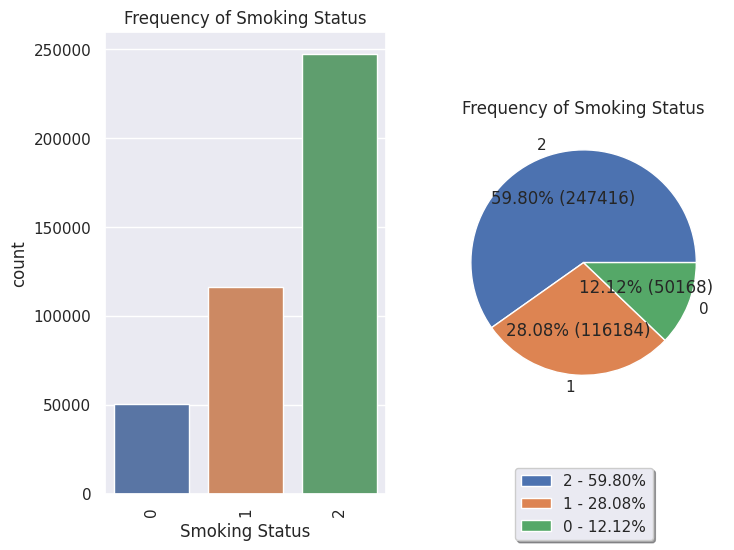

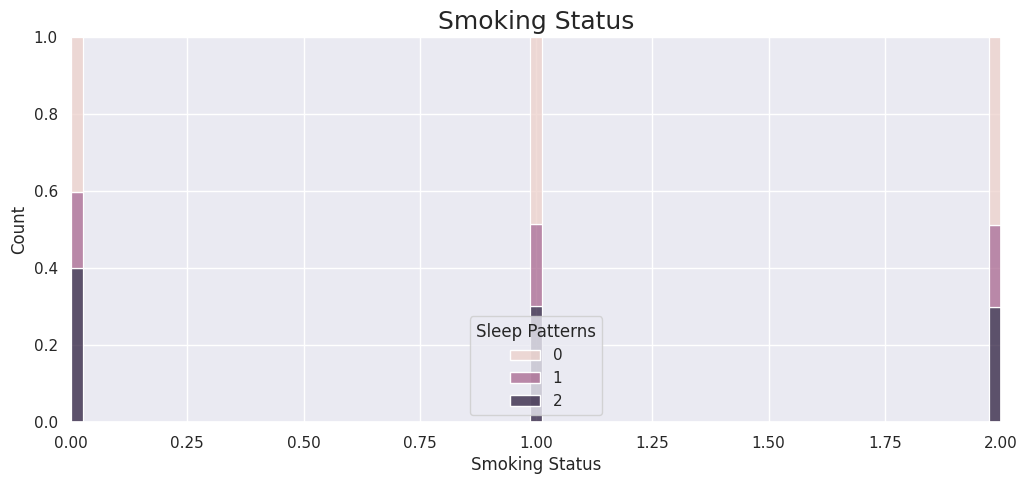

In [103]:
cat_summary(df, "Smoking Status", True)

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x="Smoking Status", hue="Sleep Patterns", multiple="fill")
plt.title("Smoking Status", fontsize = 18)
plt.show()